In [3]:
import os
import pandas as pd


In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\jaij2\OneDrive\바탕 화면\모형선택')
df = pd.read_csv('surgical_unit.csv') ## 데이터 불러오기
df

,Blood_Clotting_Score,Prognostic_Index,Enzyme_Test,Liver_Test,Age,Gender,Alc_Mod,Alc_Heavy,Survival_Time,Log_ST
0,6.7,62,81,2.59,50,0,1,0,695,6.544
1,5.1,59,66,1.70,39,0,0,0,403,5.999
2,7.4,57,83,2.16,55,0,0,0,710,6.565
3,6.5,73,41,2.01,48,0,0,0,349,5.854
4,7.8,65,115,4.30,45,0,0,1,2343,7.759
5,5.8,38,72,1.42,65,1,1,0,348,5.852
6,5.7,46,63,1.91,49,1,0,1,518,6.250
7,3.7,68,81,2.57,69,1,1,0,749,6.619
8,6.0,67,93,2.50,58,0,1,0,1056,6.962
9,3.7,76,94,2.40,48,0,1,0,968,6.875


In [8]:
variables

['Blood_Clotting_Score',
 'Prognostic_Index',
 'Enzyme_Test',
 'Liver_Test',
 'Age',
 'Gender',
 'Alc_Mod',
 'Alc_Heavy']

In [9]:
y

0      695
1      403
2      710
3      349
4     2343
5      348
6      518
7      749
8     1056
9      968
10     745
11     257
12    1573
13     858
14     702
15     809
16     682
17     205
18     550
19     838
20     359
21     353
22     599
23     562
24     651
25     751
26     545
27    1965
28     477
29     600
30     443
31     181
32     411
33    1037
34     482
35     634
36     678
37     362
38     637
39     705
40     536
41     582
42    1270
43     538
44     482
45     611
46     960
47    1300
48     581
49    1078
50     405
51     579
52     550
53     651
Name: Survival_Time, dtype: int64

In [5]:
## 전진 선택법
variables = df.columns[:-2].tolist() ## 설명 변수 리스트
 
y = df['Survival_Time'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-5-84deadb721d2>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\jaij2\anaconda3\lib\site-packages\statsmodels\tsa\tsato

In [6]:
selected_variables

['Liver_Test',
 'Alc_Heavy',
 'Enzyme_Test',
 'Prognostic_Index',
 'Blood_Clotting_Score']

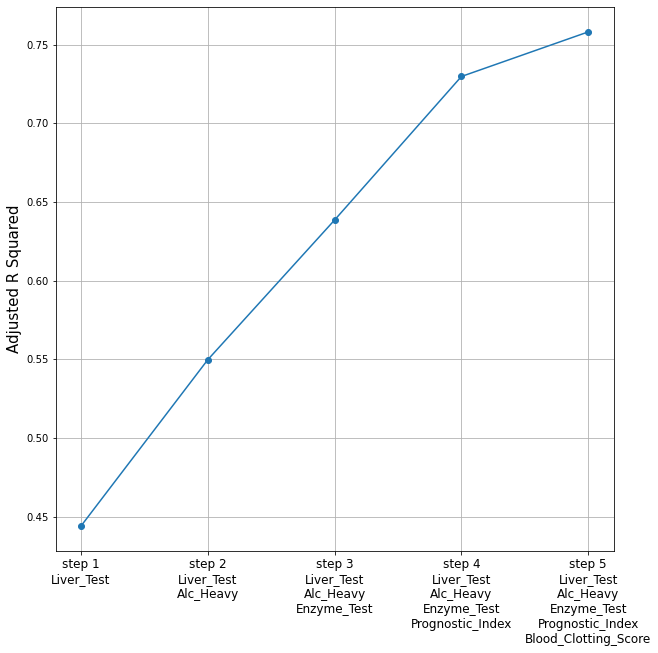

In [7]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()